<a href="https://colab.research.google.com/github/Naveensadanandan/Pytorch/blob/main/04_Custom_datasets_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
from torch import nn

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_etc"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi_etc.zip", "wb") as f:
        request = requests.get("https://github.com/Naveensadanandan/Pytorch/raw/master/pizza_steak_sushi_30_percent.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi_etc.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi_etc directory exists.


In [21]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [22]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_etc'.
There are 5 directories and 0 images in 'data/pizza_steak_sushi_etc/test'.
There are 0 directories and 83 images in 'data/pizza_steak_sushi_etc/test/pizza'.
There are 0 directories and 82 images in 'data/pizza_steak_sushi_etc/test/apple_pie'.
There are 0 directories and 68 images in 'data/pizza_steak_sushi_etc/test/chicken_wings'.
There are 0 directories and 68 images in 'data/pizza_steak_sushi_etc/test/sushi'.
There are 0 directories and 74 images in 'data/pizza_steak_sushi_etc/test/steak'.
There are 5 directories and 0 images in 'data/pizza_steak_sushi_etc/train'.
There are 0 directories and 216 images in 'data/pizza_steak_sushi_etc/train/pizza'.
There are 0 directories and 225 images in 'data/pizza_steak_sushi_etc/train/apple_pie'.
There are 0 directories and 248 images in 'data/pizza_steak_sushi_etc/train/chicken_wings'.
There are 0 directories and 199 images in 'data/pizza_steak_sushi_etc/train/sushi'.
There are

### setting up train and test directories path

---



In [23]:
train_path = image_path / "train"
test_path = image_path / "test"

train_path, test_path

(PosixPath('data/pizza_steak_sushi_etc/train'),
 PosixPath('data/pizza_steak_sushi_etc/test'))

# Visulaizing random images using PIL

steak
random image height : 384
random image width : 512


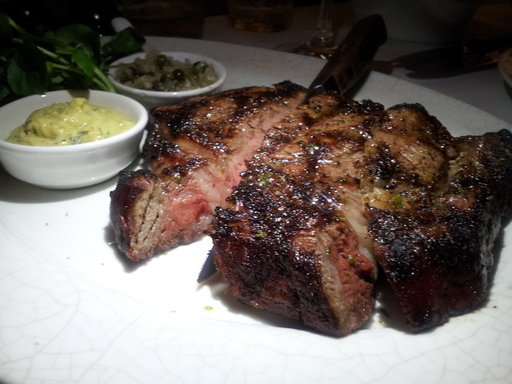

In [24]:
import random
from PIL import Image

image_paths = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_paths)

random_image_label = random_image_path.parent.stem

img = Image.open(random_image_path)

print(random_image_label)
print(f"random image height : {img.height}")
print(f"random image width : {img.width}")
img

# Visulazing random images using matplotlib

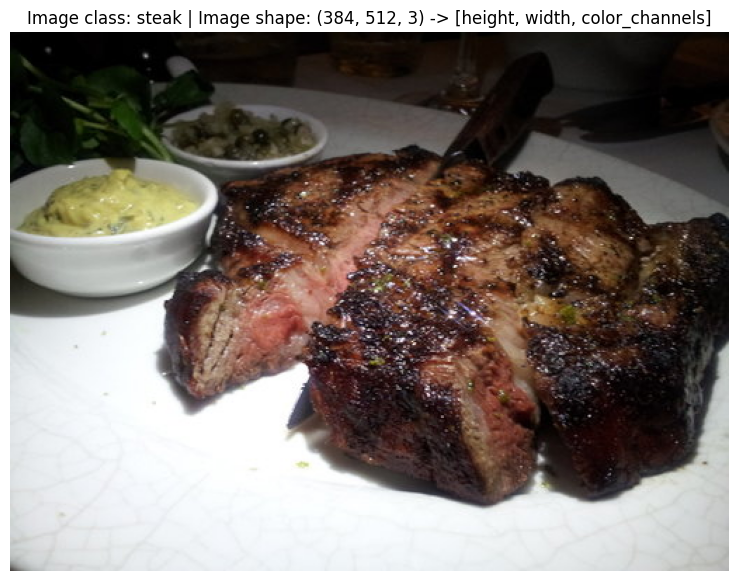

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_label} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# Transfroming data using torch.utils.data transforms

In [26]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

In [27]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [28]:
np.asarray(img).shape

(384, 512, 3)

In [29]:
data_transform(img).shape

torch.Size([3, 64, 64])

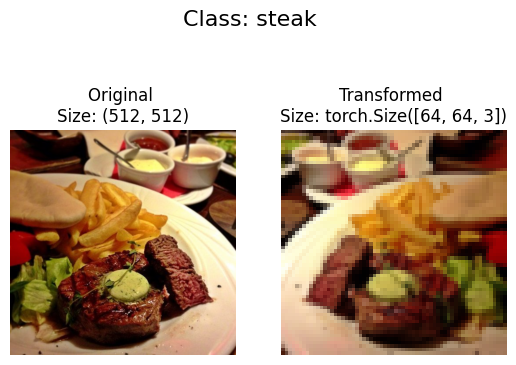

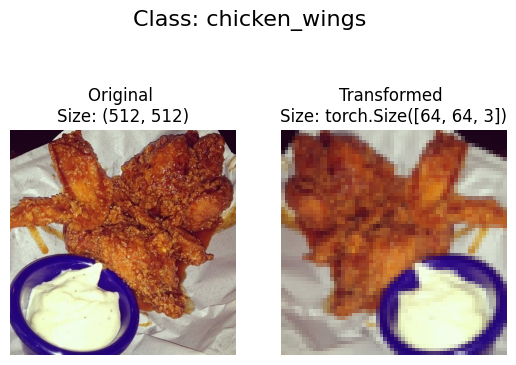

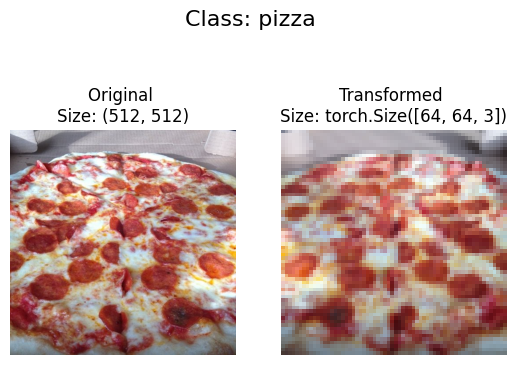

In [30]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths,
                        transform=data_transform,
                        n=3)

# Using ImageFolder for creating datasets that can be used for model

In [31]:
train_data = datasets.ImageFolder(root = train_path,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_path,
                                 transform = data_transform)
print(f"train data : \n{train_data}\ntest_data\n{test_data}")

train data : 
Dataset ImageFolder
    Number of datapoints: 1125
    Root location: data/pizza_steak_sushi_etc/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
test_data
Dataset ImageFolder
    Number of datapoints: 375
    Root location: data/pizza_steak_sushi_etc/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [32]:
classes = train_data.classes
classes

['apple_pie', 'chicken_wings', 'pizza', 'steak', 'sushi']

In [33]:
classes_dict = train_data.class_to_idx
classes_dict

{'apple_pie': 0, 'chicken_wings': 1, 'pizza': 2, 'steak': 3, 'sushi': 4}

# Creating dataloaders

In [34]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 1,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = 1,
                              shuffle = False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4e6530c4c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4e652f9090>)

In [35]:
img, label = next(iter(train_dataloader))

print(f"shape of image : {img.shape}")
print(f"label of the image : {label}")

shape of image : torch.Size([1, 3, 64, 64])
label of the image : tensor([2])


# creating a model 0 with out data augmentation

In [36]:
simple_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [37]:
#loading and transforming data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_path, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_path, transform = simple_transform)

from torch.utils.data import dataloader
import os

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(dataset=train_data_simple,batch_size=BATCH_SIZE, shuffle = True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,batch_size=BATCH_SIZE, shuffle = False, num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7f4e6512c5b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4e6512ecb0>)

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
from torch import nn
class FoodFinder(nn.Module):
  def __init__(self,input_size:int, hidden:int, output_size:int, *args, **kwargs) -> None:
     super().__init__(*args, **kwargs)
     self.conv_layer1 = nn.Sequential(
         nn.Conv2d(in_channels=input_size,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,stride=2)
         )
     self.conv_layer2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2)
         )
     self.linear_layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden*16*16,
                      out_features=output_size)
     )

  def forward(self, x:torch.tensor):
    # x = self.conv_layer1(x)
    # print(x.shape)
    # x = self.conv_layer2(x)
    # print(x.shape)
    # x = self.linear_layer(x)
    # print(x.shape)
    # return x
    return self.linear_layer(self.conv_layer2(self.conv_layer1(x)))

torch.manual_seed(42)
model_0 = FoodFinder(input_size = 3,
                     hidden = 10,
                     output_size = len(train_data.classes)).to(device)
model_0

FoodFinder(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=5, bias=True)
  )
)

In [40]:
torch.manual_seed(42)
images = torch.randn(size = (32,3,64,64))
img = images[0]
img.shape

torch.Size([3, 64, 64])

In [41]:
model_0(images.to(device))

tensor([[ 0.1356,  0.0927,  0.0638, -0.0423, -0.0526],
        [ 0.1385,  0.0873,  0.0626, -0.0514, -0.0548],
        [ 0.1291,  0.0789,  0.0538, -0.0748, -0.0462],
        [ 0.1365,  0.0802,  0.0585, -0.0517, -0.0488],
        [ 0.1300,  0.0827,  0.0538, -0.0569, -0.0464],
        [ 0.1299,  0.0978,  0.0677, -0.0463, -0.0583],
        [ 0.1333,  0.0936,  0.0665, -0.0541, -0.0488],
        [ 0.1338,  0.0808,  0.0494, -0.0503, -0.0578],
        [ 0.1312,  0.0761,  0.0691, -0.0645, -0.0580],
        [ 0.1356,  0.0884,  0.0543, -0.0588, -0.0444],
        [ 0.1214,  0.0888,  0.0550, -0.0520, -0.0487],
        [ 0.1420,  0.0853,  0.0654, -0.0493, -0.0540],
        [ 0.1317,  0.0817,  0.0470, -0.0464, -0.0480],
        [ 0.1305,  0.0772,  0.0674, -0.0542, -0.0496],
        [ 0.1328,  0.0802,  0.0626, -0.0457, -0.0459],
        [ 0.1337,  0.0837,  0.0660, -0.0518, -0.0599],
        [ 0.1285,  0.0875,  0.0612, -0.0453, -0.0440],
        [ 0.1434,  0.0836,  0.0740, -0.0413, -0.0373],
        [ 

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [43]:
img, label = next(iter(train_dataloader_simple))
img = img.to(device)
label = label.to(device)
img.shape,label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [44]:
#checking loss function
y_pred = model_0(img)
y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
loss = loss_fn(y_pred,label)
loss.item()

1.620843529701233

In [45]:
# checking accuracy function
accuracy = (y_pred_class == label).sum().item()/len(label)
accuracy

0.1875

In [61]:
#Creating a training and testing function
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0 , 0

  for batch , (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #Forward pass
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [62]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [63]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = FoodFinder(input_size=3, # number of color channels (3 for RGB)
                  hidden=10,
                  output_size=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6109 | train_acc: 0.2224 | test_loss: 1.6105 | test_acc: 0.1771
Epoch: 2 | train_loss: 1.5907 | train_acc: 0.2269 | test_loss: 1.5824 | test_acc: 0.1745
Epoch: 3 | train_loss: 1.5146 | train_acc: 0.2849 | test_loss: 1.5067 | test_acc: 0.3003
Epoch: 4 | train_loss: 1.4090 | train_acc: 0.3545 | test_loss: 1.4909 | test_acc: 0.3174
Epoch: 5 | train_loss: 1.3913 | train_acc: 0.4049 | test_loss: 1.4996 | test_acc: 0.3578
Total training time: 21.839 seconds


In [64]:
def plot_loss_curves(results: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

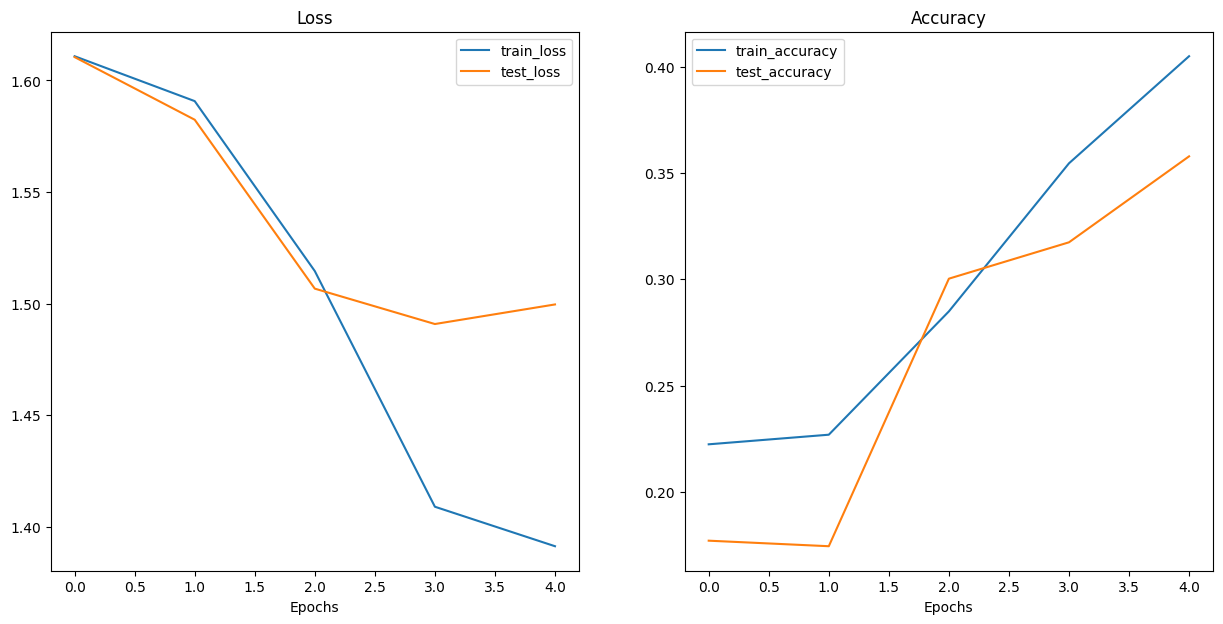

In [65]:
plot_loss_curves(model_0_results)

# model_1 with data Augmentation

In [66]:
#creating train and test transforms
train_transform_aug = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [67]:
# Turning image folders into datasets
train_data_aug = datasets.ImageFolder(
    root = train_path,
    transform=train_transform_aug,
    )
test_data = datasets.ImageFolder(
    root = test_path,
    transform=test_transform_simple
)
train_data_aug,test_data

(Dataset ImageFolder
     Number of datapoints: 1125
     Root location: data/pizza_steak_sushi_etc/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 375
     Root location: data/pizza_steak_sushi_etc/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [68]:
#creating train and test dataloaders
import os
NUM_OF_WORKERS = os.cpu_count()
BATCH_SIZE = 32

train_dataloader_aug = DataLoader(
    dataset = train_data_aug,
    batch_size=BATCH_SIZE,
    num_workers=NUM_OF_WORKERS,
    shuffle=True
)
test_dataloader_simple = DataLoader(
    dataset = test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_OF_WORKERS,
    shuffle=False
)

In [69]:
torch.manual_seed(42)
model_1 = FoodFinder(
    input_size=3,
    hidden = 24,
    output_size=len(train_data_aug.classes)).to(device)
model_1

FoodFinder(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6144, out_features=5, bias=True)
  )
)

In [70]:
#training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 40
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_aug,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6086 | train_acc: 0.2252 | test_loss: 1.6046 | test_acc: 0.1771
Epoch: 2 | train_loss: 1.5579 | train_acc: 0.2675 | test_loss: 1.4626 | test_acc: 0.3280
Epoch: 3 | train_loss: 1.4796 | train_acc: 0.3552 | test_loss: 1.4191 | test_acc: 0.3759
Epoch: 4 | train_loss: 1.4766 | train_acc: 0.3510 | test_loss: 1.4228 | test_acc: 0.3504
Epoch: 5 | train_loss: 1.4581 | train_acc: 0.3766 | test_loss: 1.4074 | test_acc: 0.3770
Epoch: 6 | train_loss: 1.4045 | train_acc: 0.4205 | test_loss: 1.4973 | test_acc: 0.3561
Epoch: 7 | train_loss: 1.4246 | train_acc: 0.3691 | test_loss: 1.4030 | test_acc: 0.4139
Epoch: 8 | train_loss: 1.4019 | train_acc: 0.4130 | test_loss: 1.4315 | test_acc: 0.3895
Epoch: 9 | train_loss: 1.3870 | train_acc: 0.4391 | test_loss: 1.3803 | test_acc: 0.4358
Epoch: 10 | train_loss: 1.3757 | train_acc: 0.4191 | test_loss: 1.3676 | test_acc: 0.4129
Epoch: 11 | train_loss: 1.3587 | train_acc: 0.4311 | test_loss: 1.3645 | test_acc: 0.4420
Epoch: 12 | train_l

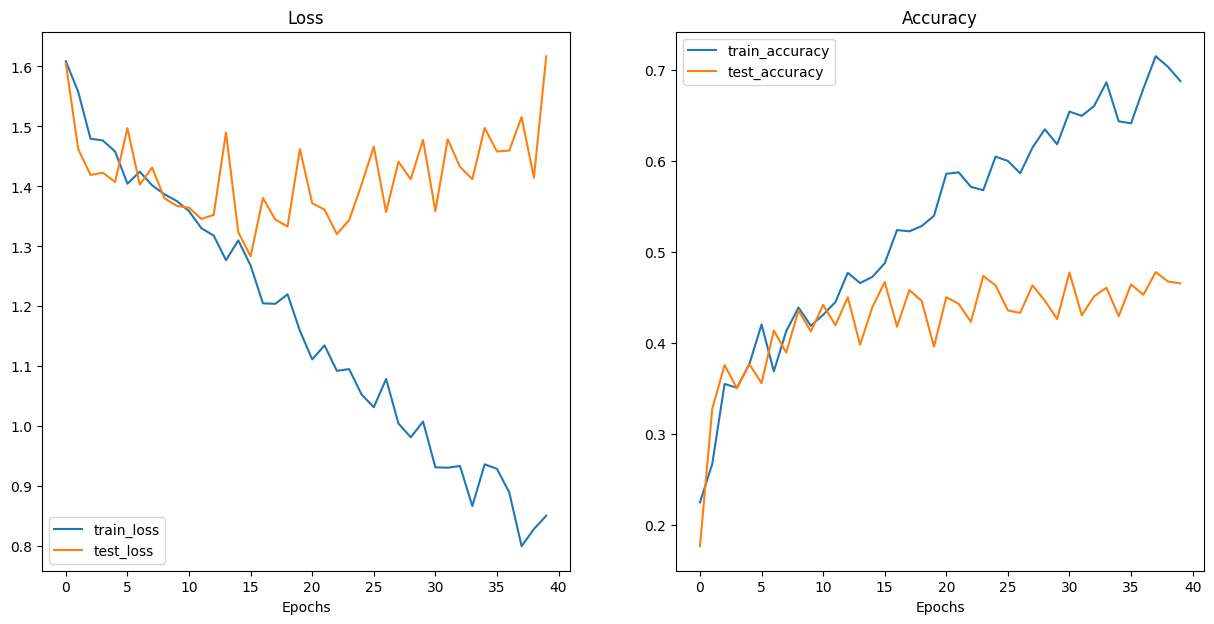

In [71]:
plot_loss_curves(model_1_results)

In [76]:
# Download custom image
import requests

# Setup custom image path
custom_image_path_1 = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path_1.is_file():
    with open(custom_image_path_1, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path_1}...")
        f.write(request.content)
else:
    print(f"{custom_image_path_1} already exists, skipping download.")

data/04-pizza-dad.jpeg already exists, skipping download.


In [92]:
import requests
from pathlib import Path

# Define the data path where the image will be stored
data_path = Path('./data')  # Adjust the path as needed
data_path.mkdir(parents=True, exist_ok=True)

# Setup custom image path
custom_image_path_2 = data_path / "04-sushi.jpeg"

# URL for the raw image file from the GitHub repository
image_url = "https://raw.githubusercontent.com/Naveensadanandan/Pytorch/main/sushi-2853382_640.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path_2.is_file():
    print(f"Downloading {custom_image_path_2}...")
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Check if the request was successful
        with open(custom_image_path_2, "wb") as f:
            f.write(response.content)
        print(f"Image downloaded successfully: {custom_image_path_2}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the image: {e}")
else:
    print(f"{custom_image_path_2} already exists, skipping download.")


Image downloaded successfully: data/04-sushi.jpeg


In [73]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])
class_names = train_data.classes

In [74]:
import torchvision
def pred_plot(model:torch.nn.Module,
              image_path:str,
              class_names:list[str],
              transform=None,
              device=device):
  target_image = torchvision.io.read_image(str(image_path))

  target_image = target_image/255

  if transform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target = target_image.unsqueeze(dim=0)
    y_pred = model(target.to(device))

  y_probs = torch.softmax(y_pred,dim=1)
  y_label = torch.argmax(y_probs,dim=1)
  plt.imshow(target_image.permute(1,2,0))
  if class_names:
    title = f"prediction : {class_names[y_label.cpu()]} | probability : {y_probs.max().cpu():.3f}"
  else:
      title = f"Pred: {y_label.item()} | Prob: {y_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False);


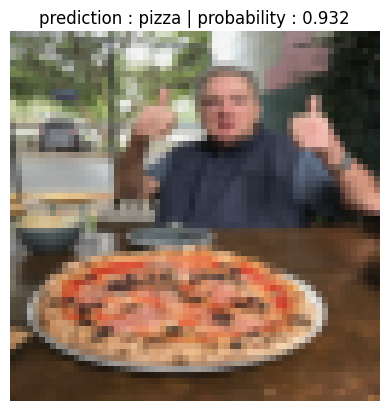

In [88]:
pred_plot(model = model_1,
          image_path=custom_image_path_1,
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

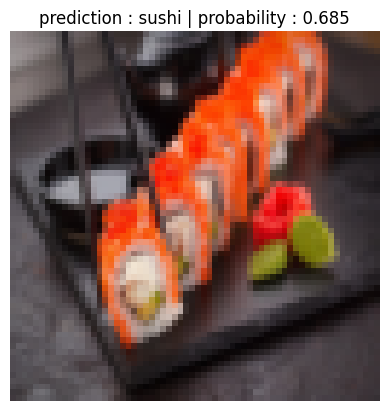

In [93]:
pred_plot(model = model_1,
          image_path=custom_image_path_2,
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

In [94]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "five_foods_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/five_foods_model.pth
